# Big Data Visualization of Neuron Spike Times as Fuzzy Point Processes
Tim Tyree<br>
6.4.2021

The assumptions of UMAP include (i) local connectivity and (ii) samples approximately uniformly distributed over the relevant information manifold.

In [1]:
#automating the boring stuff can take ~20 seconds here...
from lib.getterdone import *
# import h5py,json

In [2]:
#TODO: import a given trial
#TODO: COPY EXISTING TODO LIST HERE

## DONE: (probably irrelevant examples of exotic umap embedding)

### (get the example working for spherical embedding...)
source<br>
https://github.com/lmcinnes/umap/blob/master/doc/basic_usage.rst

In [3]:
from sklearn.datasets import load_digits

In [4]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


In [5]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
penguins = penguins.dropna()
penguins.species_short.value_counts()


Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

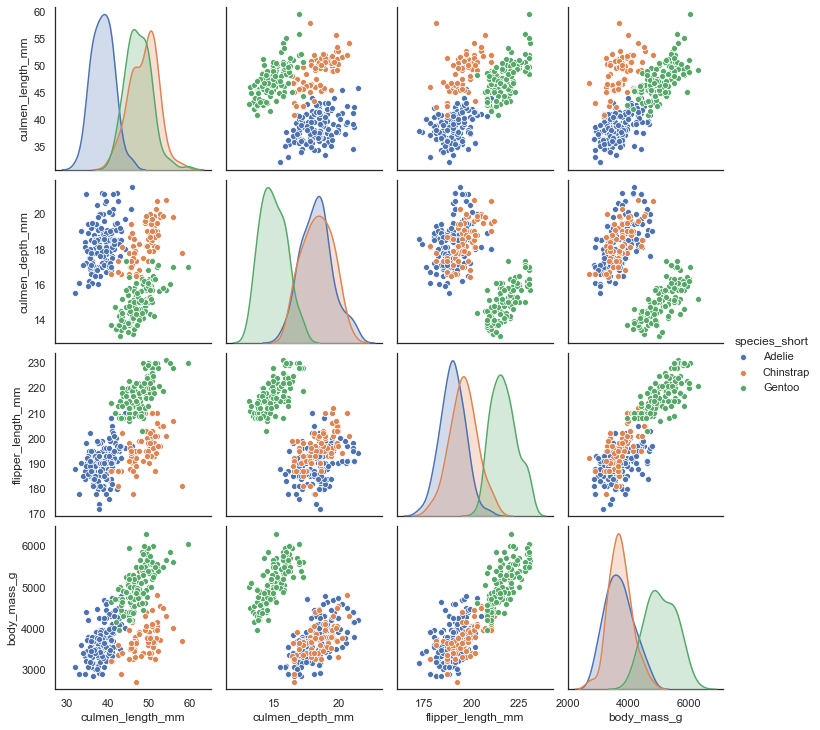

In [7]:
sns.pairplot(penguins, hue='species_short')


In [8]:
reducer = umap.UMAP()


In [11]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape


(334, 2)

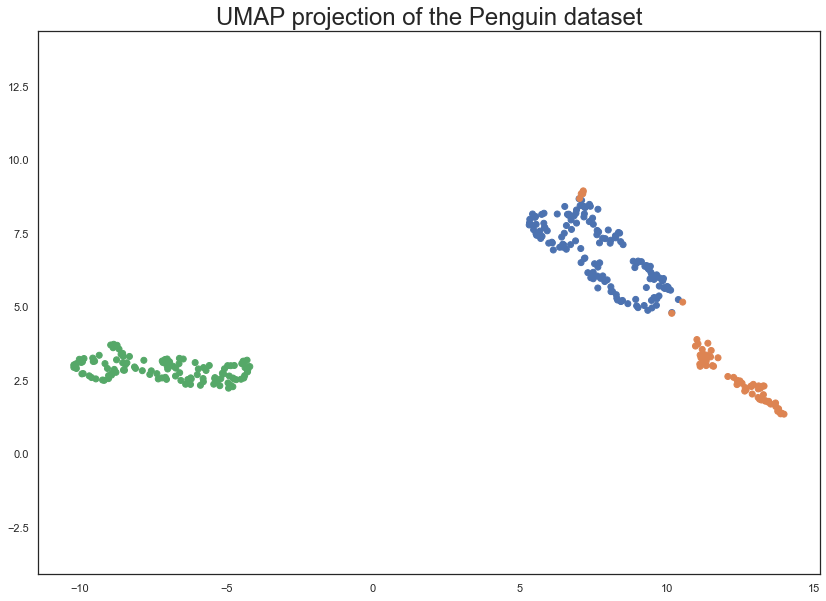

In [13]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)
plt.show()

### (get another example working for toroidal embedding...)
source<br>
https://github.com/lmcinnes/umap/blob/master/doc/basic_usage.rst

In [15]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

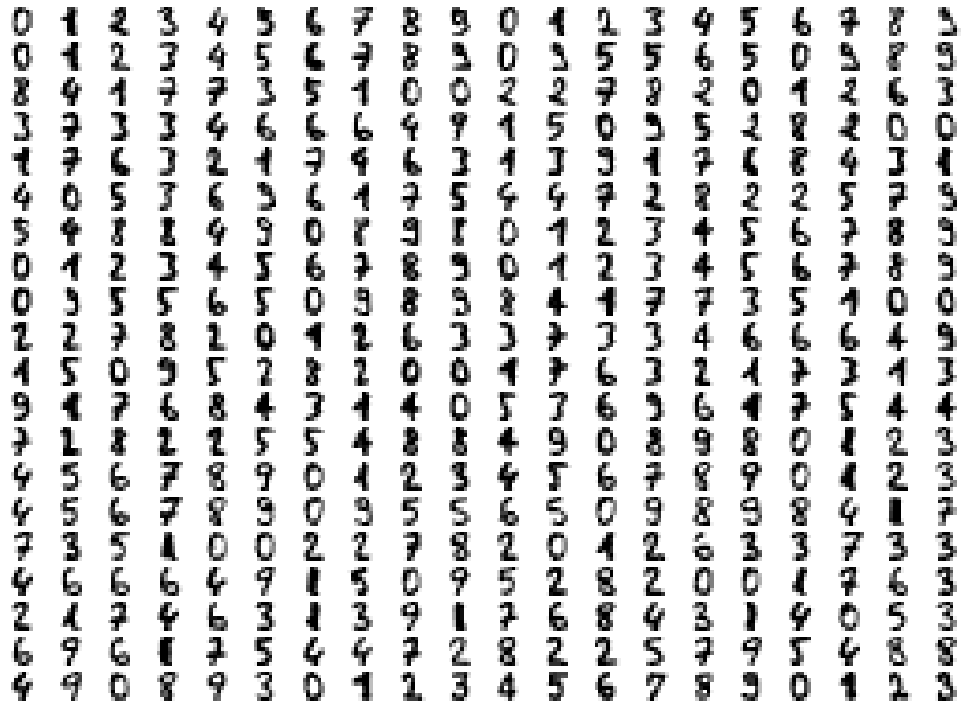

In [16]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [17]:
#TODO: find a meaningul way to represent a given neuron spike time as one of ^these images...

## DONE: a nice, practical example working for a token trial was ugly... the initial plot was good tho
https://umap-learn.readthedocs.io/en/latest/embedding_space.html#a-practical-example

In [107]:
#fit data to a gaussian mapper
gaussian_mapper = umap.UMAP(output_metric='gaussian_energy',
                            n_components=40,
                            random_state=2).fit(data)
#plot the first two axes
cmap='turbo'
fontsize=32
plt.scatter(gaussian_mapper.embedding_.T[0], gaussian_mapper.embedding_.T[1], 
            c=target, cmap='turbo', s=500, marker='.')
plt.tick_params(axis='both',labelsize=fontsize)
plt.xlabel('UMAP1 (seconds)',fontsize=fontsize)
plt.ylabel('UMAP2 (seconds)',fontsize=fontsize)
title='A Single Trial'
plt.title(title,fontsize=fontsize)
plt.show()
#                             random_state=42).fit(digits.data)
# plt.scatter(gaussian_mapper.embedding_.T[0], gaussian_mapper.embedding_.T[1], c=digits.target, cmap='Spectral')
# plt.show()

In [87]:
from matplotlib.patches import Ellipse

def draw_simple_ellipse(position, width, height, angle,
                        ax=None, from_size=0.1, to_size=0.5, n_ellipses=3,
                        alpha=0.1, color=None,
                        **kwargs):
    ax = ax or plt.gca()
    angle = (angle / np.pi) * 180
    width, height = np.sqrt(width), np.sqrt(height)
    # Draw the Ellipse
    for nsig in np.linspace(from_size, to_size, n_ellipses):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, alpha=alpha, lw=0, color=color, **kwargs))

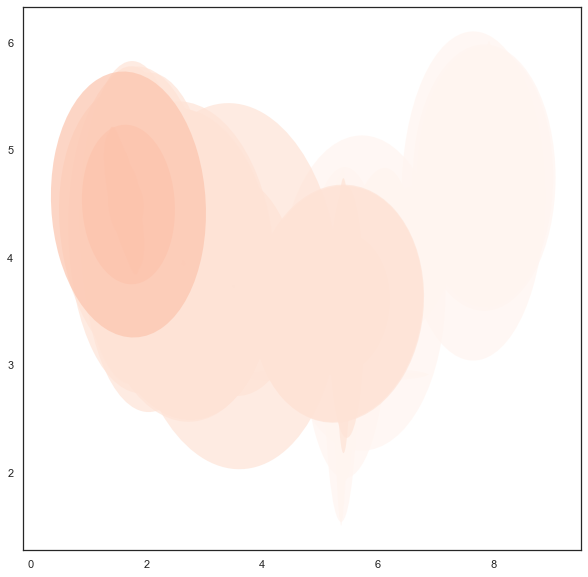

In [88]:
#plot the covariance structure of the points
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('Reds')(np.linspace(0, 1, 10))
for i in range(gaussian_mapper.embedding_.shape[0]):
    pos = gaussian_mapper.embedding_[i, :2]
    draw_simple_ellipse(pos, gaussian_mapper.embedding_[i, 2],
                        gaussian_mapper.embedding_[i, 3],
                        gaussian_mapper.embedding_[i, 4],
                        ax, color=colors[target[i]],
                        from_size=0.2, to_size=1.0, alpha=0.7)
ax.scatter(gaussian_mapper.embedding_.T[0],
           gaussian_mapper.embedding_.T[1],
           c=target, cmap='Reds', s=3)
plt.show()

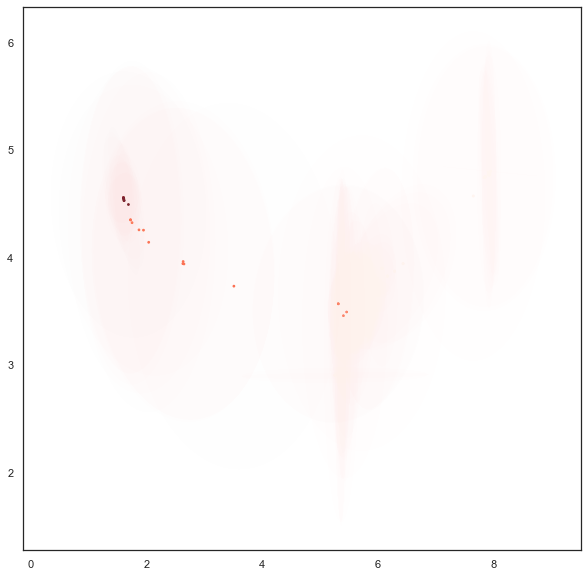

In [89]:
#plot the variation of density of clusters with respect to the covariance structure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(gaussian_mapper.embedding_.shape[0]):
    pos = gaussian_mapper.embedding_[i, :2]
    draw_simple_ellipse(pos, gaussian_mapper.embedding_[i, 2],
                        gaussian_mapper.embedding_[i, 3],
                        gaussian_mapper.embedding_[i, 4],
                        ax, n_ellipses=1,
                        color=colors[target[i]],
                        from_size=1.0, to_size=1.0, alpha=0.01)
ax.scatter(gaussian_mapper.embedding_.T[0],
           gaussian_mapper.embedding_.T[1],
           c=target, cmap='Reds', s=3)
plt.show()

In [90]:
from sklearn.neighbors import KDTree
from numba import njit
@njit(fastmath=True)
def eval_gaussian(x, pos=np.array([0, 0]), cov=np.eye(2, dtype=np.float32)):
    det = cov[0,0] * cov[1,1] - cov[0,1] * cov[1,0]
    if det > 1e-16:
        cov_inv = np.array([[cov[1,1], -cov[0,1]], [-cov[1,0], cov[0,0]]]) * 1.0 / det
        diff = x - pos
        m_dist = cov_inv[0,0] * diff[0]**2 - \
            (cov_inv[0,1] + cov_inv[1,0]) * diff[0] * diff[1] + \
            cov_inv[1,1] * diff[1]**2
        return (np.exp(-0.5 * m_dist)) / (2 * np.pi * np.sqrt(np.abs(det)))
    else:
        return 0.0

@njit(fastmath=True)
def eval_density_at_point(x, embedding):
    result = 0.0
    for i in range(embedding.shape[0]):
        pos = embedding[i, :2]
        t = embedding[i, 4]
        U = np.array([[np.cos(t), np.sin(t)], [np.sin(t), -np.cos(t)]])
        cov = U @ np.diag(embedding[i, 2:4]) @ U
        result += eval_gaussian(x, pos=pos, cov=cov)
    return result

def create_density_plot(X, Y, embedding):
    Z = np.zeros_like(X)
    tree = KDTree(embedding[:, :2])
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            nearby_points = embedding[tree.query_radius([[X[i,j],Y[i,j]]], r=2)[0]]
            Z[i, j] = eval_density_at_point(np.array([X[i,j],Y[i,j]]), nearby_points)
    return Z / Z.sum()

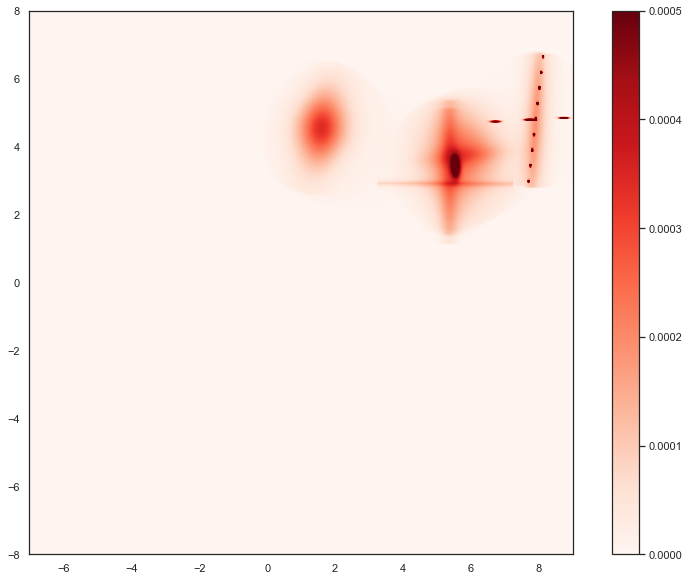

In [91]:
#plot the density plot 
X, Y = np.meshgrid(np.linspace(-7, 9, 300), np.linspace(-8, 8, 300))
Z = create_density_plot(X, Y, gaussian_mapper.embedding_)
plt.imshow(Z, origin='lower', cmap='Reds', extent=(-7, 9, -8, 8), vmax=0.0005)
plt.colorbar()

## DONE: get an example for hyperbolic embedding working

In [34]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42).fit(data)

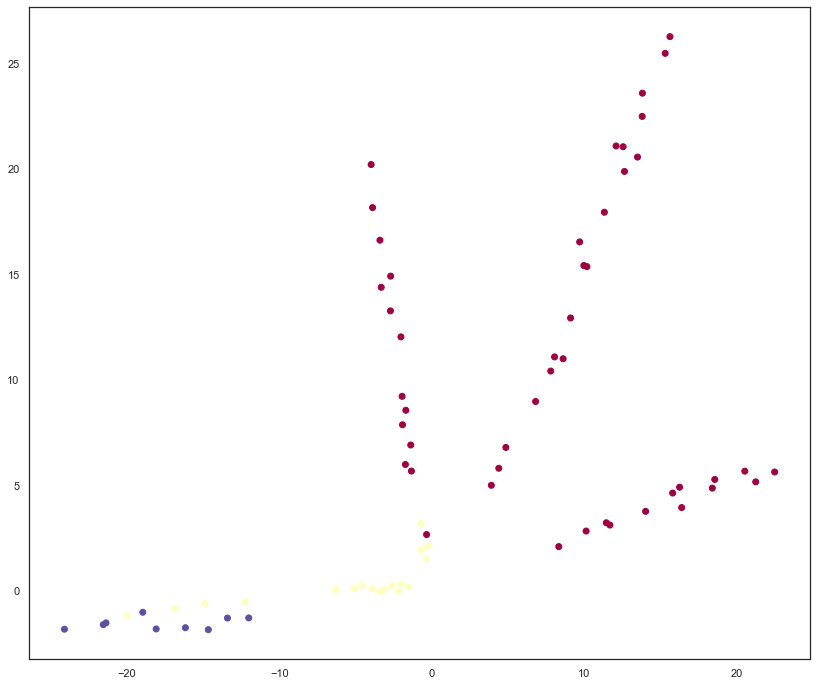

In [35]:
plt.scatter(hyperbolic_mapper.embedding_.T[0],
            hyperbolic_mapper.embedding_.T[1],
            c=target, cmap='Spectral')
plt.show()

In [36]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42).fit(data)
x = hyperbolic_mapper.embedding_[:, 0]
y = hyperbolic_mapper.embedding_[:, 1]
z = np.sqrt(1 + np.sum(hyperbolic_mapper.embedding_**2, axis=1))

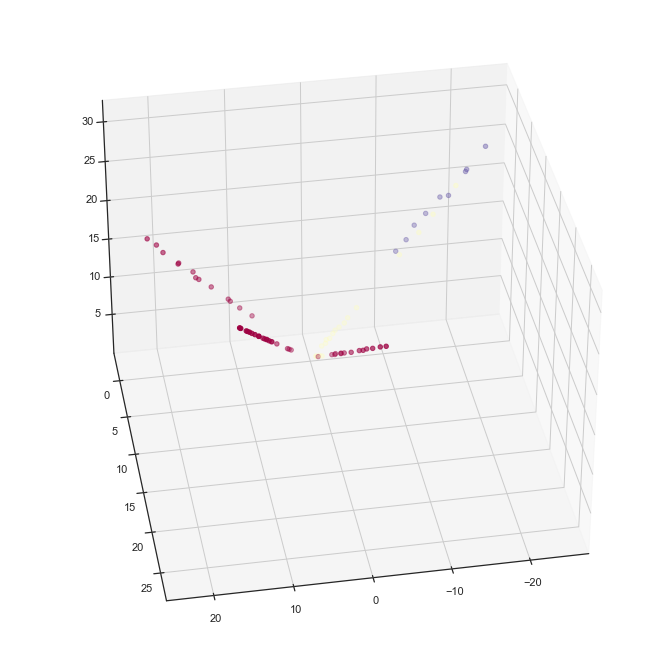

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=target, cmap='Spectral')
ax.view_init(35, 80)

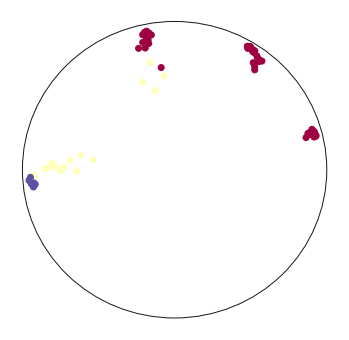

In [53]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42).fit(data)
x = hyperbolic_mapper.embedding_[:, 0]
y = hyperbolic_mapper.embedding_[:, 1]
z = np.sqrt(1 + np.sum(hyperbolic_mapper.embedding_**2, axis=1))
disk_x = x / (1 + z)
disk_y = y / (1 + z)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(disk_x, disk_y, c=target, cmap='Spectral')
boundary = plt.Circle((0,0), 1, fc='none', ec='k')
ax.add_artist(boundary)
ax.axis('off');
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
plt.show()

# DONE: representing a single trial as a umap plot as the space formed by 2d-Gaussian distributions OR hyperbolic embedding

In [19]:
#import a chunk of Mike's data, as before.
input_file_name=f"{nb_dir}/Data/Archie/spike_times_trial_20.json"
with open(input_file_name) as f:
    data_raw = json.load(f)
# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
type(data_raw)

dict

In [3]:
#input neuron id
nid_self=20#0
l=nid_self
key_self=list(data_raw.keys())[l]
times_self=np.array(data_raw[key_self],np.float64)
M=times_self.shape[0]

In [4]:
# #represent spiketime trial for 1 neuron as a point process in terms of an 1 x m x n numpy array
N=len(list(data_raw.keys()))
arr = np.full([M, N], np.nan)

#initialize a list of length N=number of neurons
# X=np.full(N,np.nan,dtype=np.float64)
#functionally compute the time since last spike time for a given time for each neuron
for m,t in enumerate(times_self):
    for n,key in enumerate(data_raw.keys()):
        spikes=np.array(data_raw[key],np.float64)
        spikes=spikes[spikes<t]
        if not spikes.shape[0]==0:
            lag=t-spikes[-1]
            arr[m,n]=lag #time since last spike in the nth neuron
            # X[n]=1/lag #rate since last spike in the nth neuron

In [5]:
#find the biggest subsquare with no nan values
#the goal is to have no nan values in arr
#find the fraction of True for each column
boo_neurons_keep=~np.isnan(arr)[-1,:]
for n in range(N):
    earliest_time_thresh=-1
    if boo_neurons_keep[n]:
        boo=np.isnan(arr)[:,n]
        frac=sum(boo)/boo.shape[0]
        #earliest time of nonnan value for given neuron is less than earliest_time_thresh
        boo_neurons_keep[n]=times_self[~boo][0]<earliest_time_thresh

In [6]:
boo_times_keep=times_self>earliest_time_thresh
Mnew=sum(boo_times_keep)
Nnew=sum(boo_neurons_keep)
arrnew=arr[boo_times_keep][:,boo_neurons_keep]
#assert there are no remaining nan values
assert (not np.isnan(arrnew).any())
data=arrnew
data.shape

(74, 188)

In [7]:
#compute spike times
spike_times=np.array(data_raw[f"{nid_self}"])

#classify spikes as before/after the stimulus
t_stim=.15#~150ms for stimulus to reach the neurons in the hippocampus
boo_before_stim=spike_times<t_stim
boo_after_stim=~boo_before_stim
target_names=[r'before',r'after']
target=boo_before_stim*0+boo_after_stim*1
target=target[boo_times_keep]

In [8]:
#classify spikes as before or during the arrival time of the information of the stimulus
t_arrival=1.5 #seconds
t_departure=2.5 #seconds
boo_before=spike_times<t_arrival
boo_after=~boo_before
boo_after&=spike_times<t_departure
boo_ignore=spike_times>=t_departure
target_names=[r'before',r'after',r'ignore']
target=boo_before*0+boo_after*1+boo_ignore*2
target=target[boo_times_keep]

In [9]:
#TODO: select the times between t=1.5 to t=2 or something else
#TODO(optionally, for merging multiple corresponding datasets): assert the shape of ^that biggest subsquare is the same as the final data

In [14]:
data.shape

(74, 188)

In [15]:
target.shape

(74,)

In [33]:
#DONE: set data to the point process array
#DONT: set target to the next spike time
#DONE: change digits.data/target to data/target in any of ^those examples 
#DONE: run those cells!
#TODO: try out the hyperbolic embedding

In [27]:
#fit data to a gaussian mapper
gaussian_mapper = umap.UMAP(output_metric='gaussian_energy',
                            n_components=40,
                            random_state=2).fit(data)
x_values=gaussian_mapper.embedding_.T[0]
y_values=gaussian_mapper.embedding_.T[1]
x_origin=5.5
y_origin=3.5
x_values=x_values-x_origin
y_values=y_values-y_origin

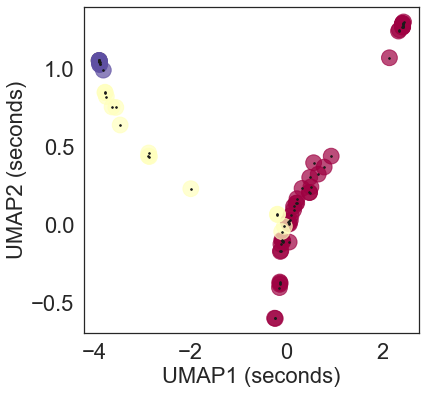

In [60]:
#plot the first two axes
cmap='Spectral'
fontsize=22
fig,ax=plt.subplots(ncols=1,figsize=(6,6))
ax.scatter(x_values, y_values, 
            c=target, cmap=cmap, s=1000, marker='.',alpha=0.7)
ax.scatter(x_values, y_values, 
            c='k', s=10, marker='.')
ax.tick_params(axis='both',labelsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_xlabel('UMAP1 (seconds)',fontsize=fontsize)
ax.set_ylabel('UMAP2 (seconds)',fontsize=fontsize)
# title='A Single Trial'
# ax.set_title(title,fontsize=fontsize+4)
fig.show()
#                             random_state=42).fit(digits.data)
# plt.scatter(gaussian_mapper.embedding_.T[0], gaussian_mapper.embedding_.T[1], c=digits.target, cmap='Spectral')
# plt.show()

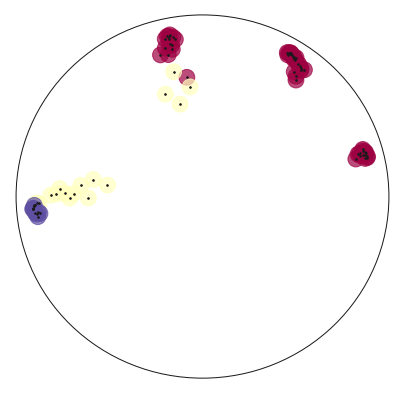

In [65]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42).fit(data)
x = hyperbolic_mapper.embedding_[:, 0]
y = hyperbolic_mapper.embedding_[:, 1]
z = np.sqrt(1 + np.sum(hyperbolic_mapper.embedding_**2, axis=1))
disk_x = x / (1 + z)
disk_y = y / (1 + z)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
# ax.scatter(disk_x, disk_y, c=target, cmap='Spectral')
ax.scatter(disk_x, disk_y, 
            c=target, cmap=cmap, s=1000, marker='.',alpha=0.7)
ax.scatter(disk_x, disk_y, 
            c='k', s=10, marker='.')
boundary = plt.Circle((0,0), 1.05, fc='none', ec='k')
ax.add_artist(boundary)
ax.axis('off');
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
plt.show()

# TODO(later?): integrate MM's new data as a point process
he has so many columns per line in _SpikeTimes.csv...<br>
_trialData.csv has 12 per row for one file<br>

In [17]:
os.chdir(f'{nb_dir}/data/gitignored')
fn_lst_times=[];trgt1='_trialTimes.csv'
fn_lst_data=[];trgt2='_trialData.csv'
fn_lst_chnl=[];trgt3='_ChannelNums.csv'
fn_lst_spike_times=[];trgt4='_SpikeTimes.csv'
fn_lst=sorted(os.listdir())[::-1]
for fn in fn_lst:
    if fn.find(trgt1)!=-1:
        fn_lst_times.append(fn)
    if fn.find(trgt2)!=-1:
        fn_lst_data.append(fn)
    #TODO: apppend each fn to the right list if trgt matches
# (better) grep by Set225

In [8]:
# for fn in fn_lst:
#     print(fn)

In [9]:
#parse a given .csv filename, fn
fn='Archie_SRT_Set210_Subset1_200514_163559_trialData.csv'
trgt='_Set'
monkey_name=fn.split('_')[0]
str_lst=fn[fn.find(trgt)+len(trgt):].split('_')
set_num=eval(str_lst[0])
extension=str_lst[-1]
{monkey_name:{set_num:{extension.split('.')[0]:fn}}}

{'Archie': {210: {'trialData': 'Archie_SRT_Set210_Subset1_200514_163559_trialData.csv'}}}

In [10]:
# Using re.findall for text
import re

listy = os.listdir()
for element in listy:
    z = re.match(trgt4, element)
if z:
    print(z.groups())
    
# patterns = [trgt1,trgt2,trgt3,trgt4]
# text = 'software testing is fun?'
# for pattern in patterns:
#     print (f'Looking for "{pattern}" in "{text}" ->')
#     if re.search(pattern, text):
#         print ('found a match!')
# else:
#     print ('no match')
# abc = 'guru99@google.com, careerguru99@hotmail.com, users@yahoomail.com'
# emails = re.findall(r'[\w\.-]+@[\w\.-]+', abc)
# for email in emails:
#     print (email)
    

In [24]:
trgt=trgt4
FN_ST='Archie_SRT_Set216_subset1_200825_164414'+trgt
# df=pd.DataFrame(FN_ST)
# df.head()
tme_lst_lst=[]
with open(FN_ST) as f:
    for line in f:
        tme_lst=[]
        for tme in line.split(','):
            tme_lst.append(tme)
        tme_lst_lst.append(tme_lst)

In [ ]:
#TODO: understand whats going on here... 
# # # How do I make a point process!?

In [19]:
print(trgt)
np.array(tme_lst_lst).shape

_trialTimes.csv


(452, 2)

In [21]:
print(trgt)
np.array(tme_lst_lst).shape

_trialData.csv


(453, 12)

In [23]:
print(trgt)
np.array(tme_lst_lst).shape

_ChannelNums.csv


(67, 1)

In [25]:
print(trgt)
np.array(tme_lst_lst).shape

_SpikeTimes.csv


(67,)

In [12]:
len(tme_lst_lst)

452

In [14]:
for tl in tme_lst_lst:
    print(len(tl))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


### get example working that combines two umap fits
https://umap-learn.readthedocs.io/en/latest/composing_models.html

In [27]:
!pip install pandas matplotlib datashader bokeh holoviews scikit-image colorcet

  Using cached colorcet-2.0.6-py2.py3-none-any.whl (1.6 MB)
  Using cached param-1.10.1-py2.py3-none-any.whl (76 kB)
  Using cached pyct-0.4.8-py2.py3-none-any.whl (15 kB)
  Using cached datashader-0.12.1-py2.py3-none-any.whl (15.8 MB)
  Using cached datashape-0.5.2.tar.gz (76 kB)
  Using cached distributed-2021.6.0-py3-none-any.whl (715 kB)
     |████████████████████████████████| 705 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 699 kB 57.1 MB/s eta 0:00:01
     |████████████████████████████████| 696 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 684 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 675 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 675 kB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 672 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 671 kB 352 kB/s eta 0:00:01
     |████████████████████████████████| 66

  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59427 sha256=6d6c3ae9a5c334570ef067cde0ebbd95d07ba36416696f6e6f30ace2e0271e2c
  Stored in directory: /Users/timothytyree/Library/Caches/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
  Created wheel for bokeh: filename=bokeh-2.3.2-py3-none-any.whl size=11334263 sha256=394ba937419df467786f5c7e31cc6d33a5d4c00c26220d7bb8b410c467a123b5
  Stored in directory: /Users/timothytyree/Library/Caches/pip/wheels/1b/a5/90/f38b6cd80a8276a7203765295ad3da078aa24ff8006096ae49
Successfully built datashape bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


In [28]:
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import numpy as np
import umap
import umap.plot

# TODO: merge two json files of spike times

## DONE: merge two umap fits via the example
source<br>
https://umap-learn.readthedocs.io/en/latest/composing_models.html <br>
^this is what I want to utilize? It combines two comparable datasets... <br>
"We can perform intersections or unions on the fuzzy topological representations." <br>
"To intersect two models simply use the * operator; to union them use the + operator." <br>
"Note that this will actually take some time since we need to compute the 2D embedding of the combined model."<br>
"As you can see, while this isn’t as good as a UMAP plot for the full MNIST dataset it has recovered the individual digits quite well."<br>
"Given that UMAP is agnostic to rotation or reflection of the final layout, this is essentially the same result as the intersection since it is almost the reflection of it in the y-axis."<br>

__Result__
- it is better to load a ~massive (<10GB) amount of labeled spike times all at once and to fit UMAP all at once

In [29]:
mnist = sklearn.datasets.fetch_openml("mnist_784")

In [30]:
mapper = umap.UMAP(random_state=42).fit(mnist.data)

<AxesSubplot:>

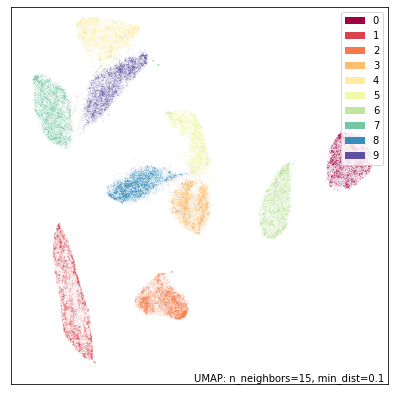

In [31]:
umap.plot.points(mapper, labels=mnist.target, width=500, height=500)

In [32]:
top = mnist.data[:, :28 * 14]
bottom = mnist.data[:, 28 * 14:]

In [33]:
top_mapper = umap.UMAP(random_state=42).fit(top)

<AxesSubplot:>

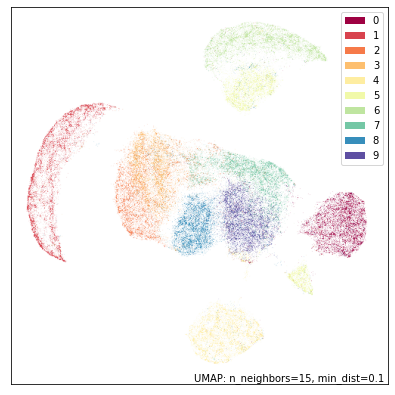

In [34]:
umap.plot.points(top_mapper, labels=mnist.target, width=500, height=500)

In [35]:
bot_mapper = umap.UMAP(random_state=42).fit(bottom)

<AxesSubplot:>

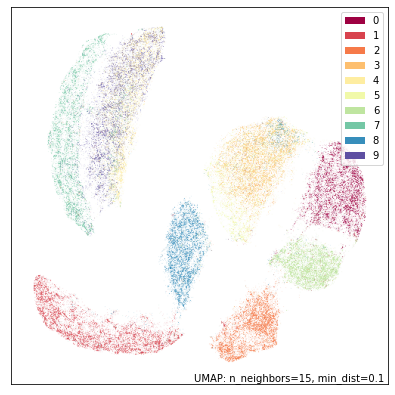

In [36]:
umap.plot.points(bot_mapper, labels=mnist.target, width=500, height=500)

In [37]:
intersection_mapper = top_mapper * bot_mapper
union_mapper = top_mapper + bot_mapper

<AxesSubplot:>

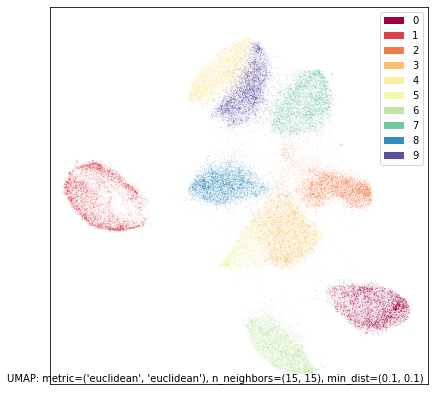

In [38]:
umap.plot.points(intersection_mapper, labels=mnist.target, width=500, height=500)

In [ ]:
umap.plot.points(union_mapper, labels=mnist.target, width=500, height=500)

In [ ]:
contrast_mapper = top_mapper - bot_mapper

In [ ]:
umap.plot.points(contrast_mapper, labels=mnist.target, width=500, height=500)

## TODO: merge two umap fits via another example
source<br>
https://umap-learn.readthedocs.io/en/latest/composing_models.html<br>
^this handles categorical features that may or may not match between datasets... unclear... avoid...

In [40]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
numeric = diamonds[["carat", "table", "x", "y", "z"]].copy()
ordinal = diamonds[["cut", "color", "clarity"]].copy()

In [42]:
scaled_numeric = RobustScaler().fit_transform(numeric)
scaled_numeric[:5]

array([[-0.734375  , -0.66666667, -0.95628415, -0.95054945, -0.97345133],
       [-0.765625  ,  1.33333333, -0.98907104, -1.02747253, -1.07964602],
       [-0.734375  ,  2.66666667, -0.90163934, -0.9010989 , -1.07964602],
       [-0.640625  ,  0.33333333, -0.81967213, -0.81318681, -0.79646018],
       [-0.609375  ,  0.33333333, -0.7431694 , -0.74725275, -0.69026549]])

In [43]:
ordinal["cut"] = ordinal.cut.map({"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4})
ordinal["color"] = ordinal.color.map({"D":0, "E":1, "F":2, "G":3, "H":4, "I":5, "J":6})
ordinal["clarity"] = ordinal.clarity.map({"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7})
ordinal.head()

,cut,color,clarity
0,4,1,1
1,3,1,2
2,1,1,4
3,3,5,3
4,1,6,1


In [44]:
#runtime was ~17 minutes for the diamonds dataset
numeric_mapper = umap.UMAP(n_neighbors=15, random_state=42).fit(scaled_numeric)
ordinal_mapper = umap.UMAP(metric="manhattan", n_neighbors=150, random_state=42).fit(ordinal.values)

<AxesSubplot:>

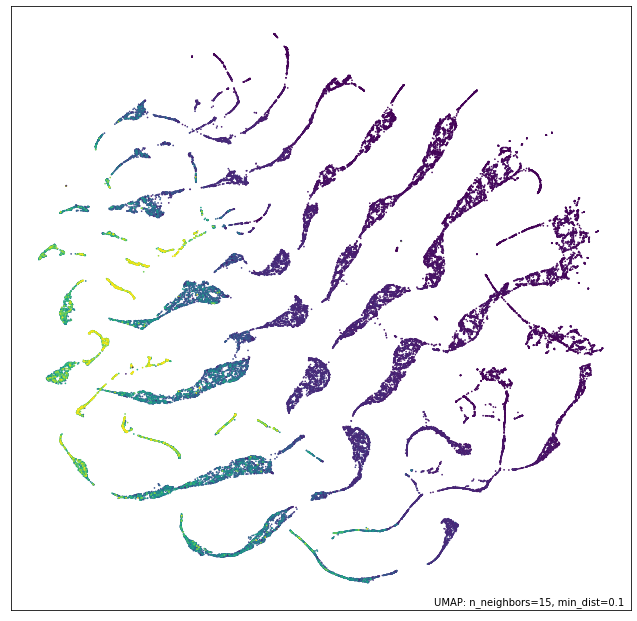

In [45]:
umap.plot.points(numeric_mapper, values=diamonds["price"], cmap="viridis")

<AxesSubplot:>

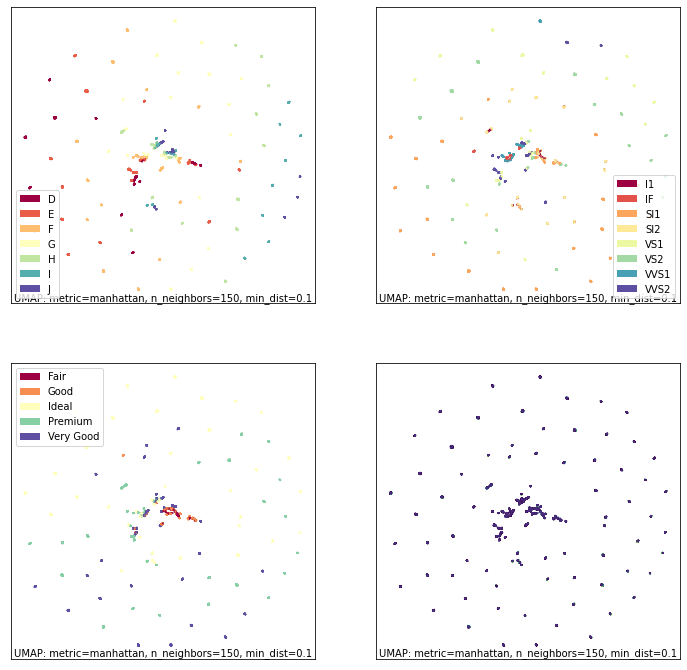

In [46]:
fig, ax = umap.plot.plt.subplots(2, 2, figsize=(12,12))
umap.plot.points(ordinal_mapper, labels=diamonds["color"], ax=ax[0,0])
umap.plot.points(ordinal_mapper, labels=diamonds["clarity"], ax=ax[0,1])
umap.plot.points(ordinal_mapper, labels=diamonds["cut"], ax=ax[1,0])
umap.plot.points(ordinal_mapper, values=diamonds["price"], cmap="viridis", ax=ax[1,1])

In [ ]:
intersection_mapper = numeric_mapper * ordinal_mapper
union_mapper = numeric_mapper + ordinal_mapper

In [ ]:
umap.plot.points(intersection_mapper, values=diamonds["price"], cmap="viridis")

In [ ]:
umap.plot.points(union_mapper, labels=diamonds["color"])

In [ ]:
contrast_mapper = numeric_mapper - ordinal_mapper

In [ ]:
umap.plot.points(contrast_mapper, values=diamonds["price"], cmap="viridis")

In [ ]:
intersect_union_mapper = umap.UMAP(random_state=42, n_neighbors=60).fit(numeric) * union_mapper

In [ ]:
umap.plot.points(intersect_union_mapper, values=diamonds["price"], cmap="viridis")

# TODO(!): use the simplest method of combining two umap plots? np.concatenate... But it doesn't scale to terrabyte sized data sets...

# TODO: compute the fuzzy complement of the test umap fit minus the control umap fit
- TODO: i.e. intersect the (optimal interval of the) test trial with the (optimal interval of the) corresponding control trial
"If you are willing to try something a little more experimental there is also a third option using the - operator which effectively intersects with the fuzzy set complement (and is thus not commutative, just as - implies). The goal here is to try to provide a sense of what the data looks like when we contrast it against a second view."